# Financial Exploratory Data Analysis

Exploratory analysis of bank stock prices and their progression throughout the financial crisis up to early 2016.   

### The Imports

In [66]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

### About The Data

Using Google finance and pandas datareader, stock data from Jan 1, 2006 to Jan 1,2016 was collected for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

### Data Processing

In [67]:
# Create start and end variables
start= datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [68]:
# Bank of America
BAC = data.DataReader('BAC','google',start,end)

# CitiGroup
C = data.DataReader('C','google',start,end)

# Goldman Sachs
GS = data.DataReader('GS','google', start,end)

# JP Morgman Chase
JPM = data.DataReader('JPM', 'google', start,end)

# Morgan Stanley
MS = data.DataReader('MS','google',start,end)

# Wells Fargo
WFC = data.DataReader('WFC','google', start,end)

** Create a list of the ticker symbols (as strings) in alphabetical order called tickers**

In [69]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

**Concatenate the bank dataframes together to a single data frame called bank_stocks and set keys argument equal to the tickers list**

In [70]:
bank_stocks = pd.concat([BAC,C,GS,JPM, MS, WFC], axis = 1, keys = tickers)

** Set the column name levels**

In [71]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [72]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# Exploratory Data Analysis

** What is the max Close price for each bank's stock throughout the time period?**

In [73]:
# For loop
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [74]:
# Access method
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [75]:
# Empty dataframe
returns = pd.DataFrame()

**Create a for loop that creates a return column for each Stock Ticker and sets it as a column in the returns DataFrame using pct_change method(). **

In [76]:
for tick in tickers:
   returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [77]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

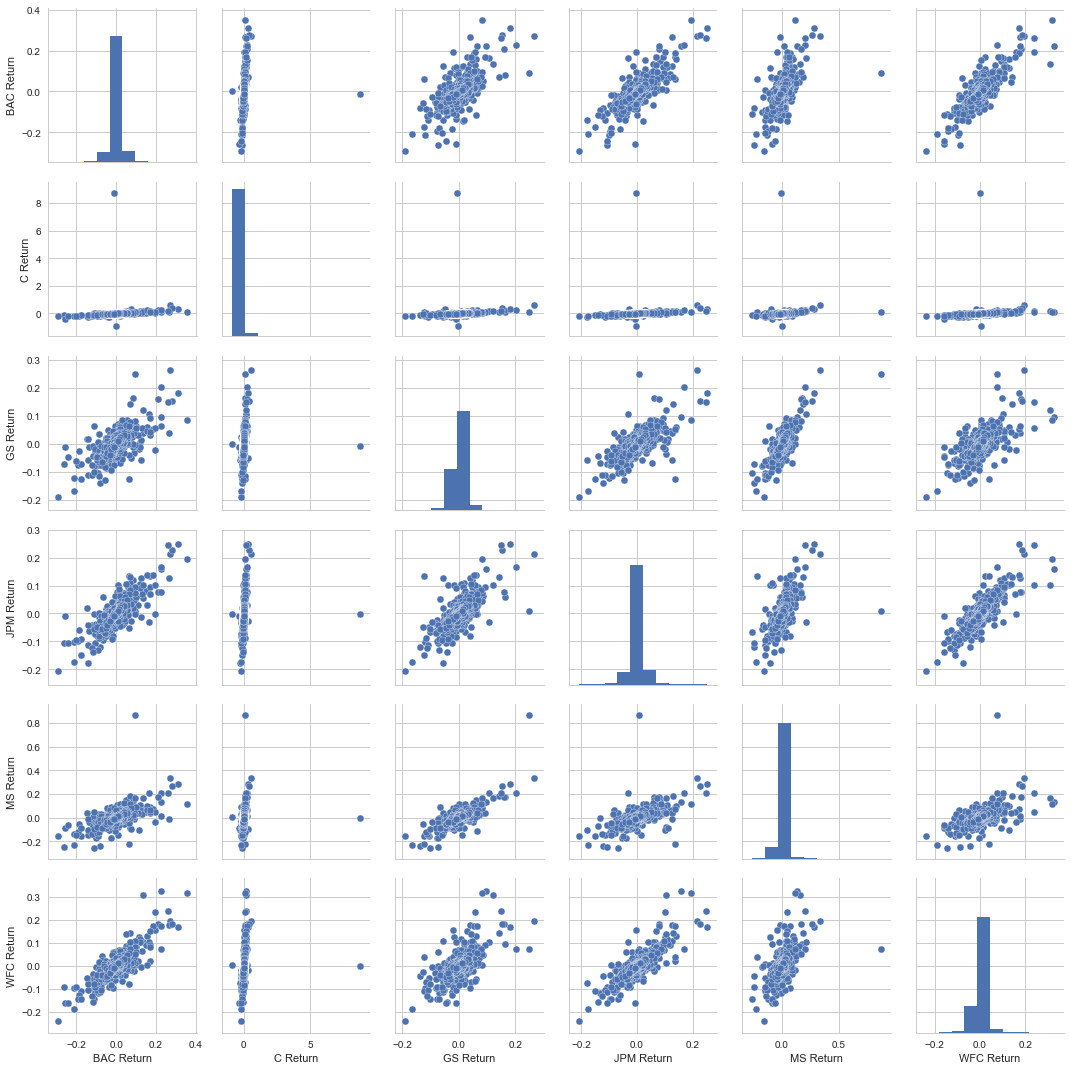

In [78]:
import seaborn as sns
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [79]:
# Worst single day returns
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [80]:
# Best single day returns
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [81]:
# Calucate standard deviations
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [117]:
# Calculate standard deviations for 2015 only
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

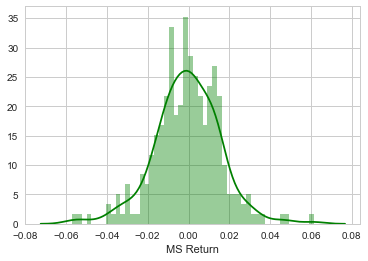

In [83]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'], color = 'green', bins =50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

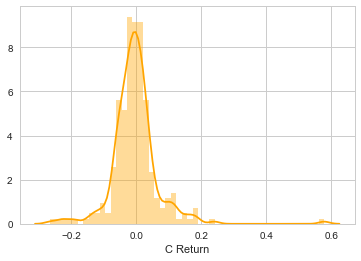

In [84]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'], color = 'orange', bins = 50)

____
# More Visualization

### Imports

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


** Create a line plot showing Close price for each bank for the entire index of time using a for loop or .xs**

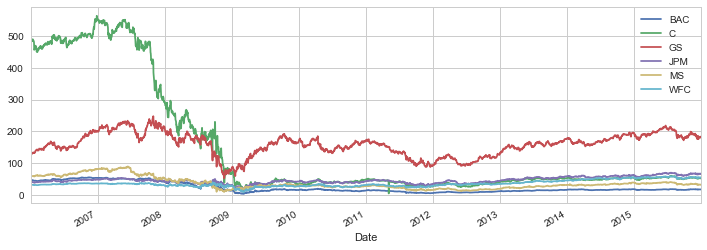

In [86]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label = tick, figsize = (12,4))
plt.legend()

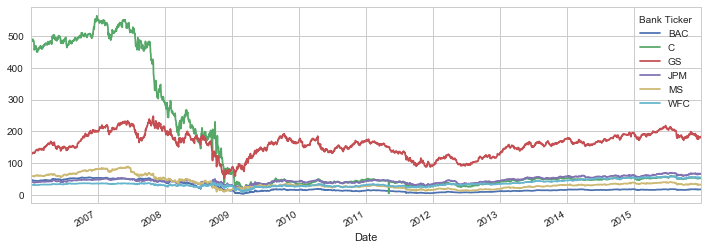

In [94]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').plot(figsize = (12,4))

bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').iplot()

## Moving Averages

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

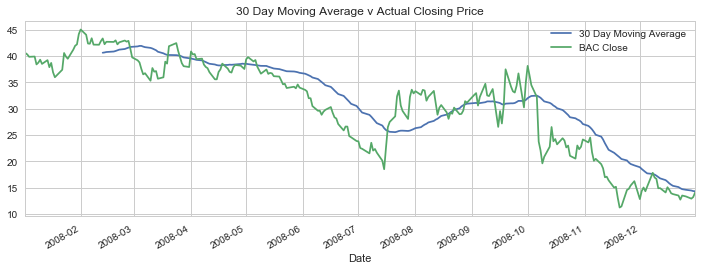

In [99]:
plt.figure(figsize =(12,4))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window = 30).mean().plot(label = '30 Day Moving Average' )
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()
plt.title('30 Day Moving Average v Actual Closing Price')

** Create a heatmap of the correlation between the stocks Close Price.**

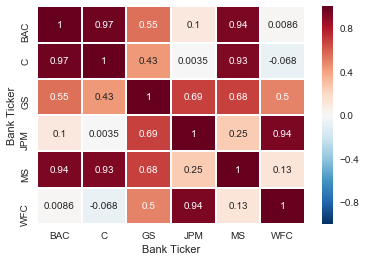

In [106]:
# Create heatmap
sns.heatmap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(),annot = True,lw = 1)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

C:\Users\sstallworth\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



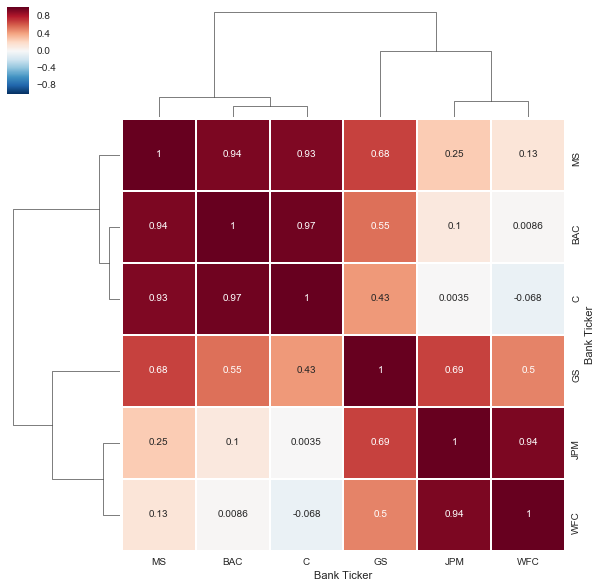

In [103]:
# Create cluter map
sns.clustermap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True, lw = 1)

close_corr = bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr()
close_corr.iplot(kind = 'heatmap', colorscale = 'rdylbu')

# Techincal Financial Analysis


** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind = 'candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma', periods = [13, 21, 55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'boll')